In [2]:
%load_ext autoreload

In [3]:
%autoreload 2
import time
import numpy as np
import matplotlib.pyplot as plt


In [4]:
lamda = 56.0 #wavelength (mm)
n_img = 100
n_shp = 300
velocity = 4 #mm/y
velocity_fading = 50 #mm/y
tmp_bl = 6 #days

vel_phase = velocity/365*4*np.pi/lamda    #0.0024 # rad/day
decorr_days = 50

vel_fading = velocity_fading/365*4*np.pi/lamda  # 0.031 # rad/day
decorr_days_fading = 11

gamma0 = 0.6
gammaf_decor = 0
gammaf_cor = 0.2
gamma_fading = 0.18

temp_baseline = np.ogrid[0:(tmp_bl * n_img):tmp_bl]
phas = -vel_phase * temp_baseline

In [6]:
rmsemat_est = np.load('/Users/Sara/Documents/insarlab/scratch/test/simulation/rmsemat_modifiedSignalEq_linear.npy')
rmsemat_est_nof = np.load('/Users/Sara/Documents/insarlab/scratch/test/simulation_nof/rmsemat_modifiedSignalEq_linear.npy')

rmsemat_s_est = np.load('/Users/Sara/Documents/insarlab/scratch/test/simulation/rmsemat_modifiedSignalEq_linear_seasonal.npy')
rmsemat_s_est_nof = np.load('/Users/Sara/Documents/insarlab/scratch/test/simulation_nof/rmsemat_modifiedSignalEq_linear_seasonal.npy')

In [7]:
#plt.plot(temp_baseline, rmsemat_est[:,0], '.')
#plt.plot(temp_baseline, rmsemat_est_nof[:,0], '.')
#plt.legend(('with fading signal', 'no fading signal'))

rmsemat_est.shape, 7*6

((100, 14), 42)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


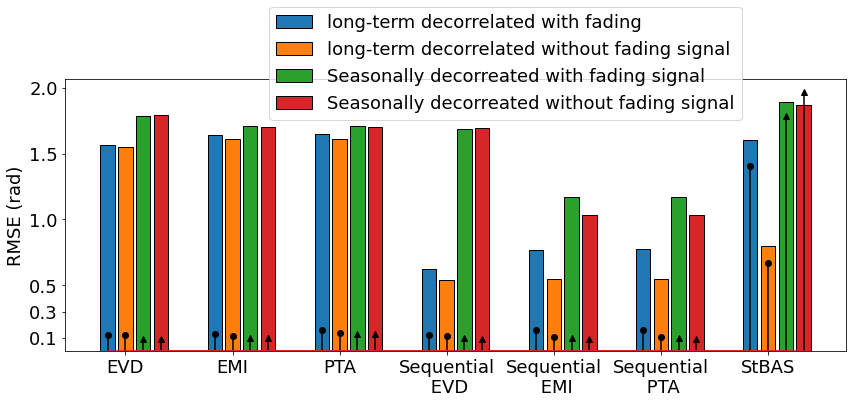

In [155]:
plt.rcParams["font.size"] = "18"

fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(np.arange(1, 42, 6)-2, np.max(rmsemat_est[:,0::2], axis=0), edgecolor='black')
ax.bar(np.arange(1, 42, 6)-1, np.max(rmsemat_est_nof[:, 0::2], axis=0), edgecolor='black')
ax.bar(np.arange(1, 42, 6), np.max(rmsemat_s_est[:,0::2], axis=0), edgecolor='black')
ax.bar(np.arange(1, 42, 6)+1, np.max(rmsemat_s_est_nof[:, 0::2], axis=0), edgecolor='black')
ax.stem(np.arange(1, 42, 6)-2, np.max(rmsemat_est[:,1::2], axis=0), markerfmt='ko', linefmt='k-')
ax.stem(np.arange(1, 42, 6)-1, np.max(rmsemat_est_nof[:, 1::2], axis=0), markerfmt='ko', linefmt='k-')
ax.stem(np.arange(1, 42, 6), np.max(rmsemat_s_est[:,1::2], axis=0),markerfmt='k^', linefmt='k-')
ax.stem(np.arange(1, 42, 6)+1, np.max(rmsemat_s_est_nof[:, 1::2], axis=0),markerfmt='k^', linefmt='k-')

ax.legend(('long-term decorrelated with fading', 'long-term decorrelated without fading signal', 
            'Seasonally decorreated with fading signal', 'Seasonally decorreated without fading signal'),
          bbox_to_anchor=(0.25, 1.3), loc='upper left')

labels = ['EVD', 
          'EMI',
          'PTA', 
          'Sequential\n EVD',
          'Sequential\n EMI',
          'Sequential\n PTA',
          'StBAS']

#plt.text(2.8, 1.2, 'test')
ax.set_xticks([0, 6, 12, 18, 24, 30, 36])
ax.set_yticks([ 0.1, 0.3, 0.5, 1.0, 1.5, 2.0])
#plt.xticklabel([0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78])
ax.set_xticklabels(labels)
ax.set_ylabel('RMSE (rad)')

fig.subplots_adjust(hspace=0,wspace=0.1)
#plt.savefig('simulation/assessment_max.eps', bbox_inches='tight', transparent=True)
#plt.savefig('simulation/assessment_max.png', bbox_inches='tight', transparent=True)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


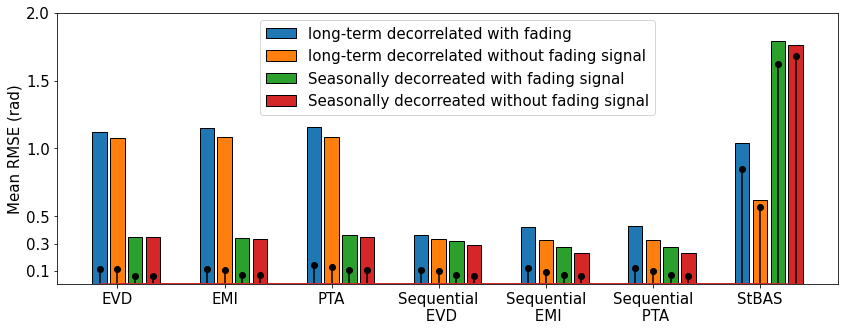

In [70]:
plt.rcParams["font.size"] = "15"

fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(np.arange(1, 42, 6)-2, np.mean(rmsemat_est[:,0::2], axis=0), edgecolor='black')
ax.bar(np.arange(1, 42, 6)-1, np.mean(rmsemat_est_nof[:, 0::2], axis=0), edgecolor='black')
ax.bar(np.arange(1, 42, 6), np.mean(rmsemat_s_est[:,0::2], axis=0), edgecolor='black')
ax.bar(np.arange(1, 42, 6)+1, np.mean(rmsemat_s_est_nof[:, 0::2], axis=0), edgecolor='black')
ax.stem(np.arange(1, 42, 6)-2, np.mean(rmsemat_est[:,1::2], axis=0), markerfmt='ko', linefmt='k-')
ax.stem(np.arange(1, 42, 6)-1, np.mean(rmsemat_est_nof[:, 1::2], axis=0), markerfmt='ko', linefmt='k-')
ax.stem(np.arange(1, 42, 6), np.mean(rmsemat_s_est[:,1::2], axis=0),markerfmt='ko', linefmt='k-')
ax.stem(np.arange(1, 42, 6)+1, np.mean(rmsemat_s_est_nof[:, 1::2], axis=0),markerfmt='ko', linefmt='k-')

ax.legend(('long-term decorrelated with fading', 'long-term decorrelated without fading signal', 
            'Seasonally decorreated with fading signal', 'Seasonally decorreated without fading signal'),
          bbox_to_anchor=(0.25, 1), loc='upper left')

labels = ['EVD', 
          'EMI',
          'PTA', 
          'Sequential\n EVD',
          'Sequential\n EMI',
          'Sequential\n PTA',
          'StBAS']

#plt.text(2.8, 1.2, 'test')
ax.set_xticks([0, 6, 12, 18, 24, 30, 36])
ax.set_yticks([ 0.1, 0.3, 0.5, 1.0, 1.5, 2.0])
#plt.xticklabel([0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78])
ax.set_xticklabels(labels)
ax.set_ylabel('Mean RMSE (rad)')

fig.subplots_adjust(hspace=0,wspace=0.1)
plt.savefig('simulation/assessment.eps', bbox_inches='tight', transparent=True)
plt.savefig('simulation/assessment.png', bbox_inches='tight', transparent=True)
plt.show()

In [57]:
diff1 = rmsemat_est[:, 0:12:2] - rmsemat_est_nof[:, 0:12:2]
diff2 = rmsemat_s_est[:, 0:12:2] - rmsemat_s_est_nof[:, 0:12:2]
diff3 = rmsemat_est[:, 1:12:2] - rmsemat_est_nof[:, 1:12:2]
diff4 = rmsemat_s_est[:, 1:12:2] - rmsemat_s_est_nof[:, 1:12:2]
diff = np.concatenate((diff1, diff2, diff3, diff4), axis=1)
diff.shape, print('mean:',np.mean(diff),'std:', np.std(diff), '\n')

diff1 = np.mean(rmsemat_est[:, 0:12:2] - rmsemat_est_nof[:, 0:12:2], axis=0)
diff2 = np.mean(rmsemat_s_est[:, 0:12:2] - rmsemat_s_est_nof[:, 0:12:2], axis=0)
diff3 = np.mean(rmsemat_est[:, 1:12:2] - rmsemat_est_nof[:, 1:12:2], axis=0)
diff4 = np.mean(rmsemat_s_est[:, 1:12:2] - rmsemat_s_est_nof[:, 1:12:2], axis=0)
diff = np.concatenate((diff1, diff2, diff3, diff4), axis=0)
diff.shape, print('mean:',np.mean(diff),'std:', np.std(diff), '\n')

mean: 0.0271333200440634 std: 0.04134729819117108 

mean: 0.027133320044063405 std: 0.02971126515897759 



((24,), None)

In [67]:
diff1 = rmsemat_est[:, 0:6:2] -  rmsemat_est[:, 6:12:2]
diff2 = rmsemat_est_nof[:, 0:6:2] -  rmsemat_est_nof[:, 6:12:2]
diff = np.concatenate((diff1, diff2), axis=1)
print('mean:',np.mean(diff),'std:', np.std(diff), '\n')

diff1 = rmsemat_s_est[:, 0:6:2] -  rmsemat_s_est[:, 6:12:2]
diff2 = rmsemat_s_est_nof[:, 0:6:2] -  rmsemat_s_est_nof[:, 6:12:2]
diff = np.concatenate((diff1, diff2), axis=1)
print('mean:',np.mean(diff),'std:', np.std(diff), '\n')

print('max:',np.max(diff), '\n')


diff1 = rmsemat_s_est[:, 0:12] 
diff2 = rmsemat_s_est_nof[:, 0:12] 
diff = np.concatenate((diff1, diff2), axis=1)
print('mean:',np.mean(diff),'std:', np.std(diff), '\n')

print('max:',np.max(diff), '\n')

mean: 0.7467547371690214 std: 0.1951169438779848 

mean: 0.0764722164572744 std: 0.2109605422799952 

max: 1.041003085432107 

mean: 0.1913819736736132 std: 0.32174711754626306 

max: 1.7951127703355518 

